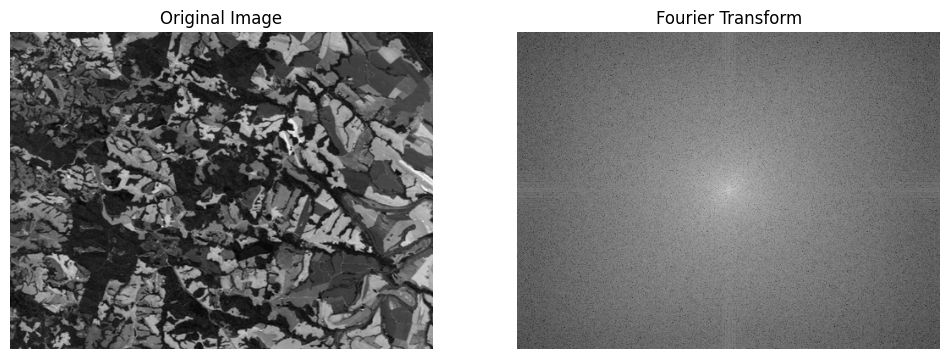

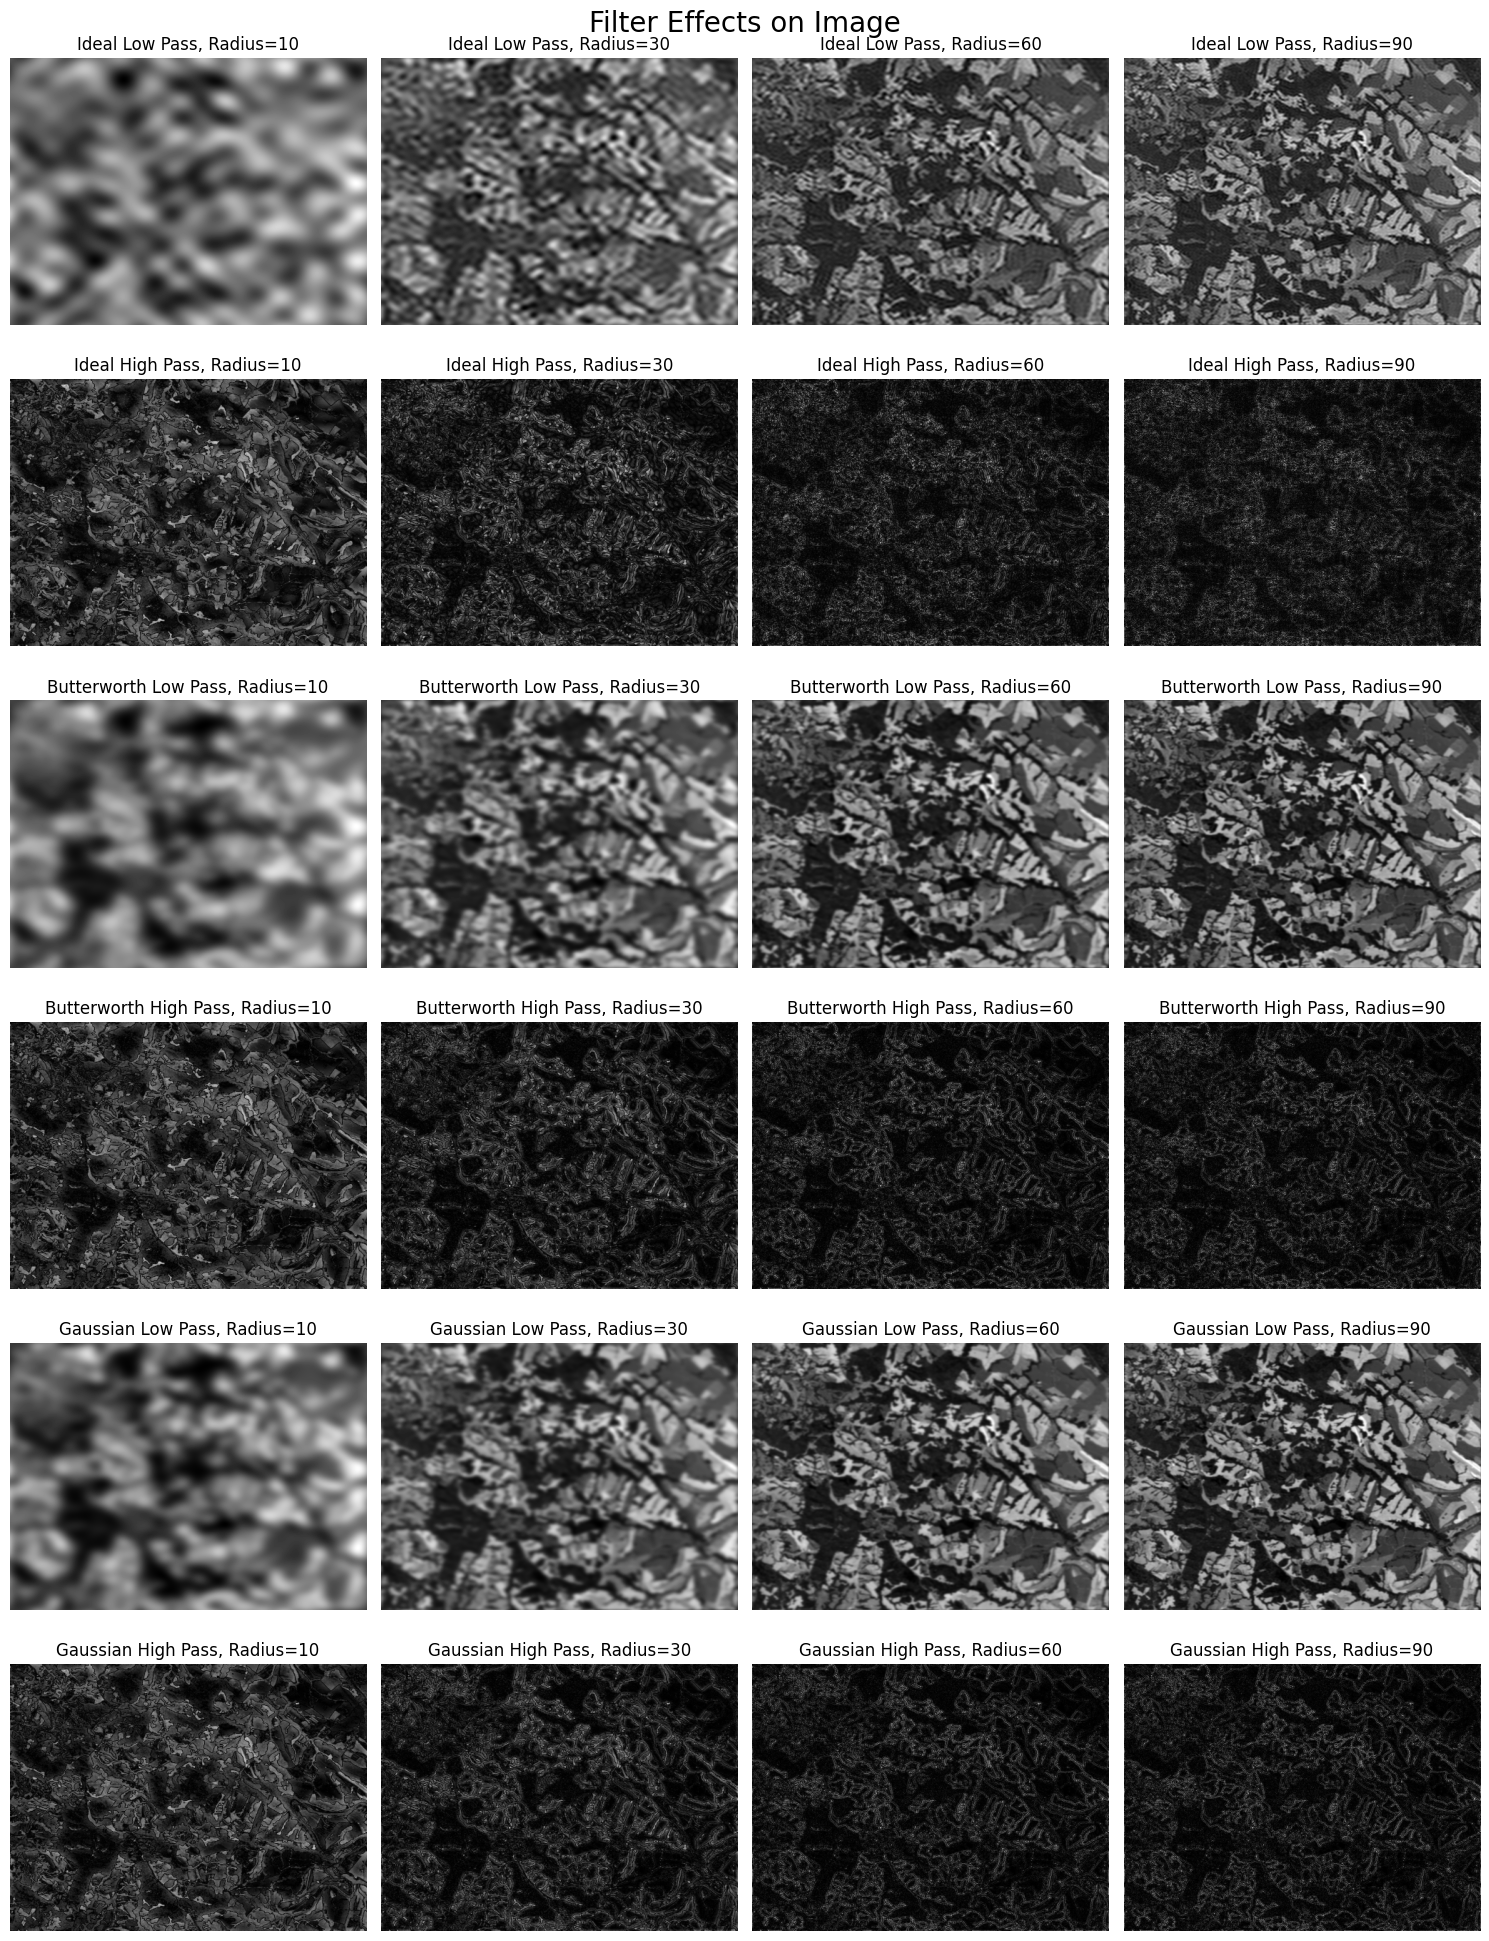

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.fft import fftshift, ifftshift, fft2, ifft2

# Function to apply Ideal Low Pass Filter
def ideal_low_pass_filter(image_shape, radius):
    rows, cols = image_shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1
    return mask

# Function to apply Ideal High Pass Filter
def ideal_high_pass_filter(image_shape, radius):
    return 1 - ideal_low_pass_filter(image_shape, radius)

# Function to apply Butterworth Low Pass Filter
def butterworth_low_pass_filter(image_shape, radius, order=2):
    rows, cols = image_shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols))
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow)**2 + (v - ccol)**2)
            mask[u, v] = 1 / (1 + (distance / radius)**(2 * order))
    return mask

# Function to apply Butterworth High Pass Filter
def butterworth_high_pass_filter(image_shape, radius, order=2):
    return 1 - butterworth_low_pass_filter(image_shape, radius, order)

# Function to apply Gaussian Low Pass Filter
def gaussian_low_pass_filter(image_shape, radius):
    rows, cols = image_shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    mask = np.exp(-((x - crow)**2 + (y - ccol)**2) / (2 * (radius**2)))
    return mask

# Function to apply Gaussian High Pass Filter
def gaussian_high_pass_filter(image_shape, radius):
    return 1 - gaussian_low_pass_filter(image_shape, radius)

# Function to apply a frequency filter
def apply_filter(dft_shift, filter_mask):
    return dft_shift * filter_mask

# Function to visualize frequency and spatial domain
def visualize_filtering(image, filter_radius_list):
    # Step 1: Transform image to frequency domain
    f_transform = fft2(image)
    f_transform_shifted = fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))  # For visualization

    # Step 2: Display Original Image and its Fourier Transform
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Fourier Transform')
    plt.axis('off')
    plt.show()

    # Step 3: Apply each filter type and visualize results
    filter_types = {
        "Ideal Low Pass": ideal_low_pass_filter,
        "Ideal High Pass": ideal_high_pass_filter,
        "Butterworth Low Pass": butterworth_low_pass_filter,
        "Butterworth High Pass": butterworth_high_pass_filter,
        "Gaussian Low Pass": gaussian_low_pass_filter,
        "Gaussian High Pass": gaussian_high_pass_filter
    }

    plt.figure(figsize=(15, 20))
    plot_index = 1

    for filter_name, filter_func in filter_types.items():
        for radius in filter_radius_list:
            # Create the filter mask
            filter_mask = filter_func(image.shape, radius)

            # Apply the filter on the Fourier transform
            filtered_shift = apply_filter(f_transform_shifted, filter_mask)

            # Inverse Fourier transform to get the image back
            inverse_shift = ifftshift(filtered_shift)
            img_back = ifft2(inverse_shift)
            img_back = np.abs(img_back)

            # Plotting the filtered image
            plt.subplot(len(filter_types), len(filter_radius_list), plot_index)
            plt.imshow(img_back, cmap='gray')
            plt.title(f'{filter_name}, Radius={radius}')
            plt.axis('off')
            plot_index += 1

    plt.suptitle("Filter Effects on Image", fontsize=20)
    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Step 1: Load the image
    img = cv2.imread('P4_image.png', 0)  # Read as grayscale
    if img is None:
        print("Error: Image not found. Please ensure the image name is correct.")
        return

    # Step 2: Define filter radii to analyze
    filter_radius_list = [10, 30, 60, 90]  # Different radii to test

    # Step 3: Visualize the impact of each filter type with varying radius
    visualize_filtering(img, filter_radius_list)

# Run the main function
if __name__ == "__main__":
    main()


**INTERFERENCE**

This program demonstrates the use of various frequency domain filters to process an image using the Fourier Transform. It begins by converting the image into the frequency domain and then applies different filters such as Ideal, Butterworth, and Gaussian (both low-pass and high-pass) to analyze the impact of each on the image. By varying the cutoff radius, the program visualizes the effect of each filter type on image quality and frequency representation, allowing a comparative study of how these filters affect the detail and sharpness of the image.